In [9]:
import pandas as pd
from src.finance_get import GetData
from src.model_ensemble import GbmModel
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
ticker_symbol = 'CL=F'
df = yf.download(ticker_symbol)
df = pd.DataFrame(df)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131
...,...,...,...,...,...,...
2024-06-28,81.860001,82.720001,80.970001,81.540001,81.540001,260252
2024-07-01,81.449997,83.639999,81.379997,83.379997,83.379997,345780
2024-07-02,83.430000,84.379997,82.720001,82.809998,82.809998,367787


In [14]:
get_obj = GetData(ticker_symbol='CL=F')
val_df, vol_df = get_obj.val_vol_datasets(lags=30,step=1)
model = GbmModel(val=val_df, vol= vol_df,n_X=25)
X_train, X_test, y_train, y_test= model.splitting_sum_vol()


[*********************100%%**********************]  1 of 1 completed


In [15]:
import pickle
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [16]:
y_pred = loaded_model.predict(X_test)

In [17]:
data = pd.DataFrame({
    'Index': range(len(y_test.iloc[0])),
    'True Values': y_test.iloc[0],
    'Predicted Values': y_pred[0]
})

y_test1 = y_test.iloc[0]
y_pred1 = y_pred[0]

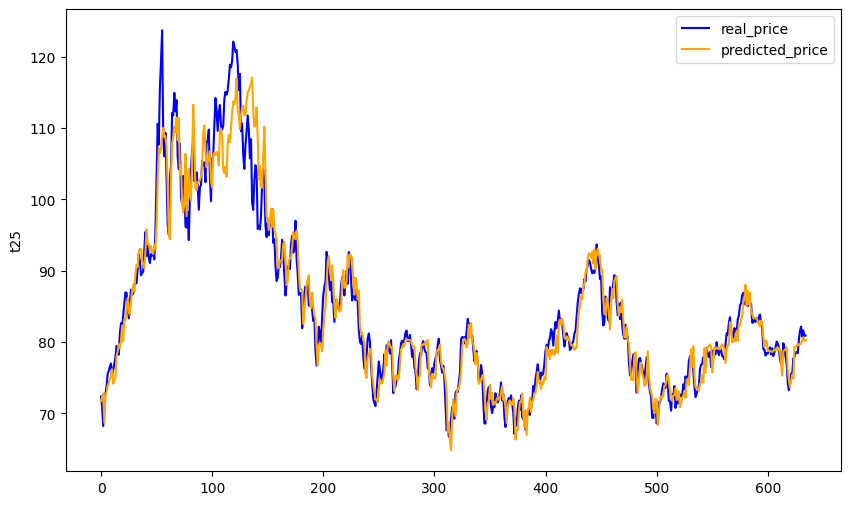

In [20]:
i=0
y_test1 = y_test.reset_index(drop=True)
y_test1 = y_test1.iloc[:,i]
y_pred1 = y_pred[:,i]
plt.figure(figsize=(10, 6))
sns.lineplot(data=y_test1, color='blue', label='real_price')
sns.lineplot(data=y_pred1, color='orange', label='predicted_price')
plt.legend()
plt.show()